There are two derivatives that we can take programmatically: the first is the analytical, or exact, derivative of a function. This is the 'real' derivative. If we have a nice equation describing the function, we can deduce a nice equation describing the function's derivative. A traditional first course in calculus is mostly about learning to do this by hand. The second type of derivative is the numerical derivative of a function. If we can't or don't want to calculate the exact derivative, we use the numerical derivative as an approximate substitute. This is fine for many purposes. especially when we're working with messy data that has some uncertainty in it to begin with.

### The analytical derivative of a function
The analytical derivative of a function `f(x) = x^n` is equal to `nx^(n-1)`. You can apply this rule to any function in order to calculate its derivative.

[Sympy](http://www.sympygamma.com) can calculate the analytical derivative of a function. 


### The numerical derivative of a function
When we know the function and it's not too complicated, it is usually easiest to find the analytical derivative of the function and then use it to calculate the derivative at some value `x`. When we don't have a nice equation describing our function, we can use the "finite difference" method to calculate the derivative at value `x`.

To start, let's look at the definition of the exact derivative f'(x). It goes something like this: first, calculate the difference between f(x + 0.1) and f(x), divided by 0.1:

`[f(x + 0.1) - f(x)] / 0.1`

We think of this as a "small change in f per small change in x." Now make the difference smaller:

`[f(x + 0.01) - f(x)] / 0.01`

Now even smaller:

[f(x + 0.001) - f(x)] / 0.001`

If our function has a derivative at all (and not all functions do, although most every function we'll work with does), as we make the finite difference smaller and smaller this ratio will settle down to some definite number. f'(x) is, by definition, the value it settles down to. But this gives us a useful way to approximate f'(x): rather than calculating what the ratio settles down to as the finite difference (or "step size") grows infinitely small, we can just use a small *enough* step size. The smaller the step size, the better an approximation we can expect. For example, the ratio

`[f(x + 0.000001) - f(x)] / 0.000001`

is an excellent approximation to f'(x).


## Symbolic derivative

This graph shows the derivative of $sin(x)$, $cos(x)$. Because we already know the derivative of $sin(x)$ symbolically, it is easy to compute the derivative and graph it.

Not the offset in plotting the derivative, `plt.plot(x,d_x*x+d_x-0.67,'r')`: `d_x*x` is the equation for a line slope, and `d_x-0.67` is the `y` intercept so that we can lay the derivative line on top of the `sin` function that it is derivative of.

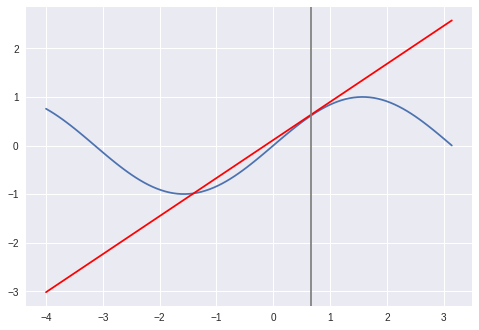

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4,np.pi,100)
sin_x = np.sin(x)
plt.plot(x,sin_x)
d_x = np.cos(0.67)
plt.plot(x,d_x*x+d_x-0.67,'r')
plt.axvline(0.67,color="gray")

*italicized text*### Finite Difference - Your Assignment

When we calculate finite differences using tabular data in an array form, we can only calculate the derivative using the values that exist in the array.

The derivative at any point `p` in an array of data `y`, a function of `x`, is simply `(y[p+1]-y[p]) / (x[p+1]-x[p])`.


[[-7.  -5.  -3.  -1.   1.   3.   5.   7.   8. ]
 [ 4.   3.   1.5  0.3 -1.8 -3.  -4.  -4.1 -4. ]]
[[-7.   4. ]
 [-5.   3. ]
 [-3.   1.5]
 [-1.   0.3]
 [ 1.  -1.8]
 [ 3.  -3. ]
 [ 5.  -4. ]
 [ 7.  -4.1]
 [ 8.  -4. ]]


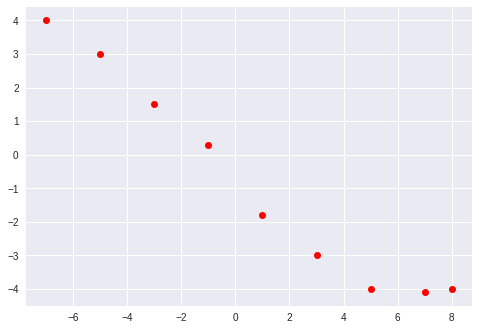

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# create your input array
x = [-7, -5, -3, -1, 1, 3, 5, 7, 8]

# fill it with values from a hand drawn -sigmoid-ish function
y = [4, 3, 1.5, 0.3, -1.8, -3, -4, -4.1, -4]

# tranpose it so it looks like the lecture matrix
y = np.matrix([[-7, -5, -3, -1, 1, 3, 5, 7, 8],[4, 3, 1.5, 0.3, -1.8, -3, -4, -4.1, -4]])
print(y)
print(y.T)
y = y.T

# plot it as a sanity test:
plt.plot(y[::,0:1:],y[::,1:2:],'ro')



# Linear interpolation between two values

Filling in for data that is missing



[[-2.4]]


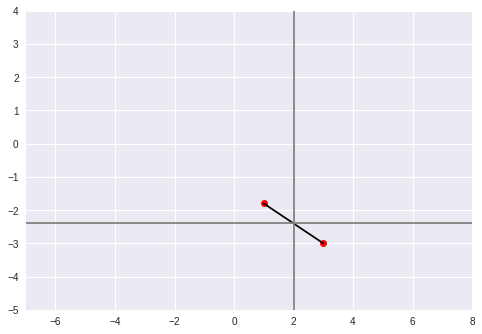

In [3]:
def interpolate(x,x_prime,fraction):
  # fraction must be between 0 and 1
  return x+(x_prime*fraction - x*(1.0-fraction))
  
m = np.matrix([[1,3],[-1.8,-3]]).T
plt.plot(m[::,0:1:],m[::,1:2:],'ro')
plt.plot(m[::,0:1:],m[::,1:2:],'black')
plt.xlim((-7,8))
plt.ylim((-5,4))
x_at = 2.0
plt.axvline(x_at,color="gray")

x_values = m[::,0:1:]
y_values = m[::,1:2:]


fraction = (x_at-x_values[0])/(x_values[1]-x_values[0])
y_interpolated = interpolate(y_values[0],y_values[1],fraction)



print(y_interpolated)
plt.axhline(y_interpolated,color="gray")


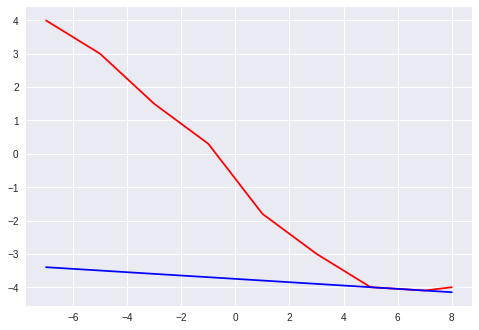

In [4]:
# Lets actually compute the finite difference

def d_f_x_finite_difference(x_array,f_x,at_x):
  upper = np.argmax(x_array>at_x)
  lower = upper-1
  if(upper==0):
    upper = 1
    lower = 0
  return ((f_x[upper]-f_x[lower])/(x_array[upper]-x_array[lower]))



# choose a value along x to compute the derivative
at_x = 6

# compute the derivative with d_f_x_finite_difference
d_x = d_f_x_finite_difference(y[::,0:1:],y[::,1:2:],at_x)

# interpolate the value of x at `at_x` because we don't have 
# a sample there
x_samples = y[::,0:1:]
y_samples = y[::,1:2:]

x_argm = np.argmax(x_samples>at_x)
x_upper = x_samples[x_argm]
x_lower = x_samples[x_argm-1]

fraction = (at_x-x_lower)/(x_upper-x_lower)
y_interpolated = interpolate(y_samples[x_argm-1],y_samples[x_argm],fraction)

# graph the derivative as a line of the form y = mx+b
mxb = d_x*x_samples.T - d_x*at_x+y_interpolated
mxb = np.matrix(mxb).T

plt.plot(y[::,0:1:],y[::,1:2:],'r')
plt.plot(y[::,0:1:],mxb,'b')

# getting `b` right is tricky, but the mx part is easy

In [0]:
# Hypothetically:

# Hey, we measured hypoconfabulator after configuring at 1.2 bar pressure,
# here are the values:

y = [9, 2, 3, 9, 1, 4, 4, 2] 
x = [0, 1, 2, 3, 4, 5, 6, 7] # We were not given x, x is simply the
# indices of the y array